# Question 1
Lets consider mixed-membership model for the survey data case. In the survey data, each group (document in the topic modeling) is one survey. So one individual. Observed data are the answers given in the survey, global patterns (the topics in topic model) are the per question answer patterns. Proportions on the other hand reflect the subject level proportions. The goal is to obtain information about subjects without simply clustering the data directly. The task is to take the data from (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) and to consider only categorical attributes (such as 2,3,4,5...). Define the generative process and draw graphical model. Note do not consider attribute 21 in your model.

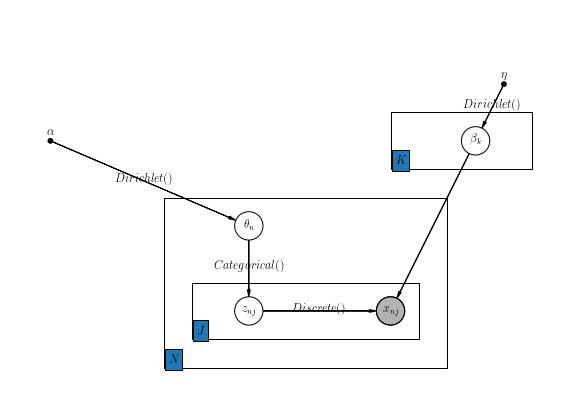

In [29]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

# Instantiate the PGM.
pgm = daft.PGM([10, 7], origin=[0.3, 0.3])

# Mixture proportions
pgm.add_node(daft.Node("alpha", r"$\alpha$", 1, 5, fixed=True))
pgm.add_node(daft.Node("theta_n", r"$\theta_n$", 4.5, 3.5))

# Mixture components
pgm.add_node(daft.Node("eta", r"$\eta$", 9, 6, fixed=True))
# pgm.add_node(daft.Node("sigma", r"$\sigma^2$", 6, 5, fixed=True))
pgm.add_node(daft.Node("beta_k", r"$\beta_k$", 8.5, 5))

# Generation
pgm.add_node(daft.Node("z_nj", r"$z_{nj}$", 4.5, 2))
pgm.add_node(daft.Node("x_nj", r"$x_{nj}$", 7, 2, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "theta_n", label="$Dirichlet()$")
pgm.add_edge("eta", "beta_k", label="$Dirichlet()$")
pgm.add_edge("theta_n", "z_nj", label=r"$Categorical()$")
# pgm.add_edge("sigma", "x_n")
pgm.add_edge("beta_k", "x_nj")
pgm.add_edge("z_nj", "x_nj", label=r"$Discrete()$")

# Dirichlet plate
# pgm.add_plate(daft.Plate([2.5, 4, 1, 1.5], label=r"$K$"))

# Mixture components plate
pgm.add_plate(daft.Plate([7, 4.5, 2.5, 1], label=r"$K$"))

# User plate
pgm.add_plate(daft.Plate([3, 1, 5, 3], label=r"$N$"))

# Answer plate
pgm.add_plate(daft.Plate([3.5, 1.5, 4, 1], label=r"$J$"))

# Render and save.
pgm.render()